# Remove bad images for one time correlation

## Using same image (repeating the same image for 10000 times)

In [4]:
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import cm
import matplotlib as mpl
%matplotlib notebook

import skbeam.core.correlation as corr
import skbeam.core.roi as roi
import skbeam.core.mask as mask

<IPython.core.display.Javascript object>


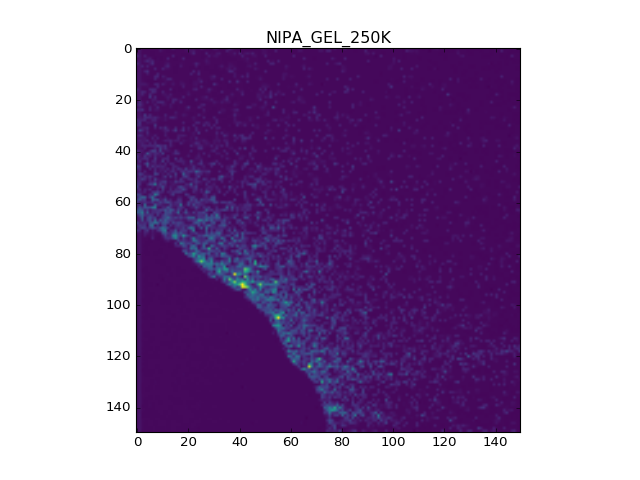

In [5]:
num_levels = 6
num_bufs = 8

# if we are 1.5 or later
if float('.'.join(mpl.__version__.split('.')[:2])) >= 1.5:
    cmap = 'viridis'
else:
    cmap = 'CMRmap'

# load the data
img_stack = np.load("/Volumes/Data/All_NSLS2/scikit-beam-examples/demos/time_correlation/100_500_NIPA_GEL.npy")
fig, ax = plt.subplots()
# plot the first image to make sure the data loaded correctly
ax.imshow(img_stack[0], cmap=cmap)
ax.set_title("NIPA_GEL_250K")



In [6]:
# define the ROIs
roi_start = 78 # in pixels
roi_width = 9 # in pixels
#roi_spacing = (5.0, 4.0)
x_center = 7. # in pixels
y_center = (129.) # in pixels
num_rings = 1

# get the edges of the rings
edges = roi.ring_edges(roi_start, width=roi_width, num_rings=num_rings)

# get the label array from the ring shaped 3 region of interests(ROI's)
labeled_roi_array = roi.rings(
    edges, (y_center, x_center), img_stack.shape[1:])

<IPython.core.display.Javascript object>


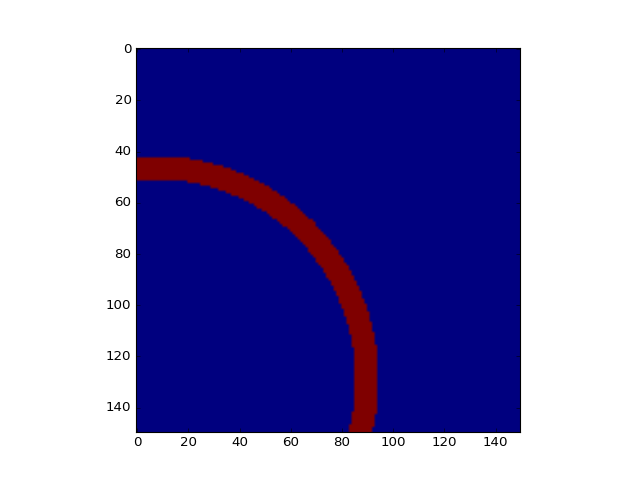

In [7]:
fig, ax = plt.subplots()
ax.imshow(labeled_roi_array)
plt.show()

## Take the first image and repeat for 10000 times

In [9]:
y = []
for i in range(10000):
    y.append(img_stack[0])

In [10]:
g2y, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, np.asarray(y))

##  Results with no bad images 

<IPython.core.display.Javascript object>


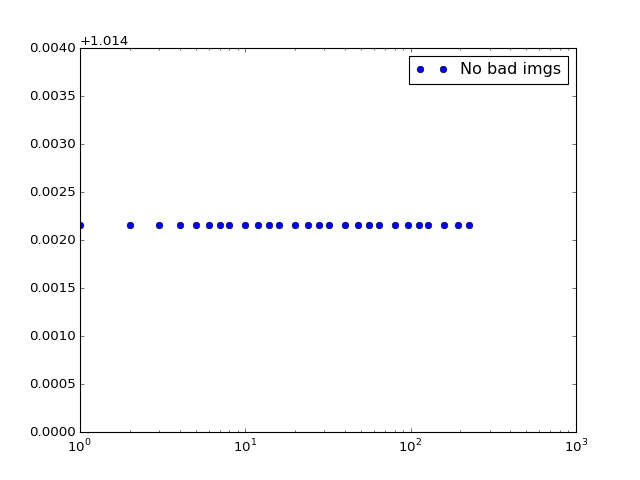

In [11]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "o", label="No bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.legend()
plt.show()

## introduce 10 bad images

In [12]:
bad_list = np.random.choice(np.arange(10000), size=10)
imgs = mask.bad_to_nan_gen(y, bad_list)
bad_list

array([2024, 6672, 2297, 4944, 8489, 5627, 5102, 3799, 5945, 8224])

In [13]:
g2_10, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)

<IPython.core.display.Javascript object>


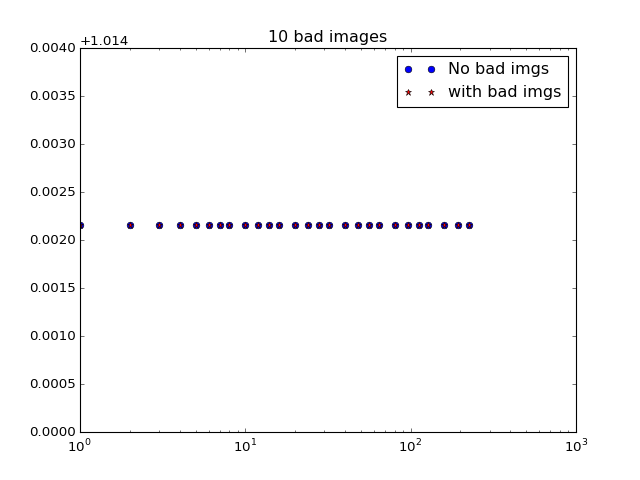

In [14]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_10[:, 0], "r*", label="with bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("10 bad images")
ax.legend()
plt.show()

In [ ]:
## 20 bad images

In [15]:
bad_list_2 = np.random.choice(np.arange(10000), size=20)

imgs = mask.bad_to_nan_gen(y, bad_list_2)
bad_list_2

array([6217, 3281, 2508, 6922, 4548, 8399, 3743, 1647, 8595, 1598, 3436,
       2369,  623, 4787, 7192, 6143, 5378, 4548, 3572, 5466])

In [16]:
g2_20, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)

<IPython.core.display.Javascript object>


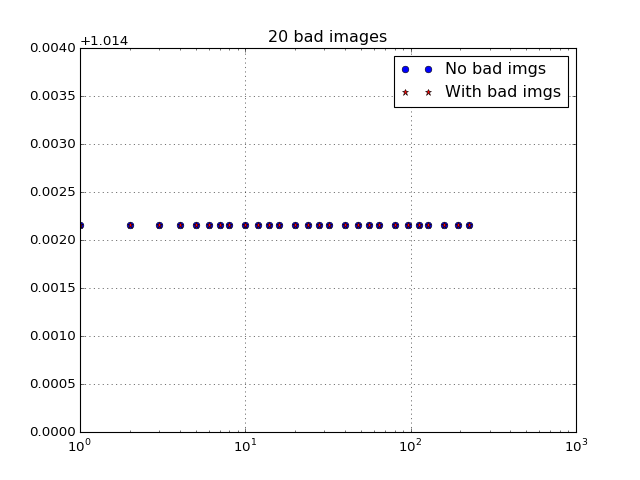

In [17]:
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_20[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("20 bad images")
ax.legend()
plt.show()

## 50 bad images

In [18]:
bad_list_3 = np.random.choice(np.arange(10000), size=50)
bad_list_3

array([2440, 4951,  458, 3759, 1767, 1867, 1136, 7945, 4045,  184, 6226,
       7838, 6204, 2401, 3004, 9607, 8620, 6741, 5694, 9438, 5397, 3226,
       5653, 1235, 9841, 3192, 7777, 2084, 3632, 9950, 8007, 4776, 3935,
       8816, 5110, 4264, 8440, 2328, 3862, 9850, 5480, 7580, 9819, 8847,
       7202, 9054, 7851, 2630, 7061, 3972])

<IPython.core.display.Javascript object>


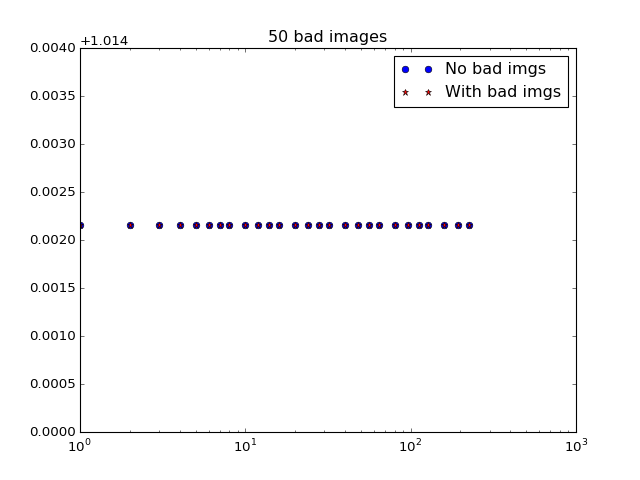

In [19]:
imgs = mask.bad_to_nan_gen(y, bad_list_3)
g2_50, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_50[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("50 bad images")
ax.legend()
plt.show()

## 100 bad images

In [20]:
bad_list_100 = np.random.choice(np.arange(10000), size=100)
bad_list_100

array([8057, 2089, 5277, 5526, 3021, 5268, 8970, 8380,  596,  344, 4046,
       9475, 2603, 1236, 3020, 1903, 4603, 9243, 1109,  743, 9848, 4311,
       5666, 5107, 4528, 3194, 2047, 2488, 5761, 6998, 7150, 9813, 2408,
       6594, 5395, 4040, 4611,  187, 5661, 2581, 7322, 8134, 2754, 9604,
       5936,  822, 9373, 6732,  608, 1697, 7269,  800, 7788, 9667, 3491,
       6900, 7955, 6057, 9149, 6623, 2472, 3237, 4399, 8354, 4330, 9197,
       4390, 8719, 4373, 9251, 8287, 9540,  548, 8662, 2403, 3812, 9242,
       6031, 9772, 6976, 5721, 2419, 9560, 4784, 5616, 3416,  349, 5058,
       9528, 3219, 9245, 4422, 4694, 6526, 6309, 6618, 1106, 7282, 3072,
       9454])

<IPython.core.display.Javascript object>


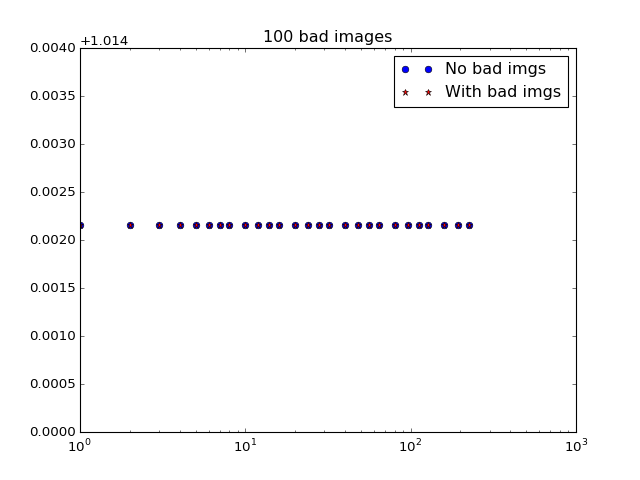

In [22]:
imgs = mask.bad_to_nan_gen(y, bad_list_100)
g2_100, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_100[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("100 bad images")
ax.legend()
plt.show()

## 200 bad images

In [23]:
bad_list_200 = np.random.choice(np.arange(10000), size=200)
bad_list_200

array([1758, 7053, 7748, 4720, 9488, 9246, 5457, 7837, 6840, 6527, 4553,
        300,  255, 5640, 1301, 2366, 9044, 7926, 5631,  135, 4672, 2094,
       4299, 6050, 2313, 2662, 3438, 8123, 2453, 9767, 1911, 3323, 4899,
       9736, 4204, 1907,  731, 1426, 2321, 4102, 9286, 5259, 1610, 5095,
       4416, 2057, 6798, 4832, 7640,  954, 8823, 1450, 2472, 5311, 6571,
       5025, 8899,  948, 2025, 8536, 1117, 4256, 6484, 9755, 7847, 8499,
       7211, 2870, 1750, 8128, 4135, 8545, 2682, 8729, 1460, 5809, 1079,
        940, 8751, 2415, 3446, 6324,  382,  307, 1522, 3171, 4002,  388,
        428, 1825, 4508, 3745, 4887, 9163, 6522, 4726, 5499, 6862, 6338,
        300, 6423,  415, 9123,    1,  729, 6496, 4678, 4270, 3009, 6186,
       7945, 4493, 2852, 3336, 5000, 8929, 6912, 5257, 6224, 2057, 2673,
       6341, 1866, 1725,  422,  629, 9893,  567, 7367, 2578, 8824, 5762,
       6868, 1183, 9085, 5629, 4854, 5528, 3177, 5232, 6730, 1279, 3995,
       5475, 1332, 6957, 8327, 5864, 9013, 3246, 97

<IPython.core.display.Javascript object>


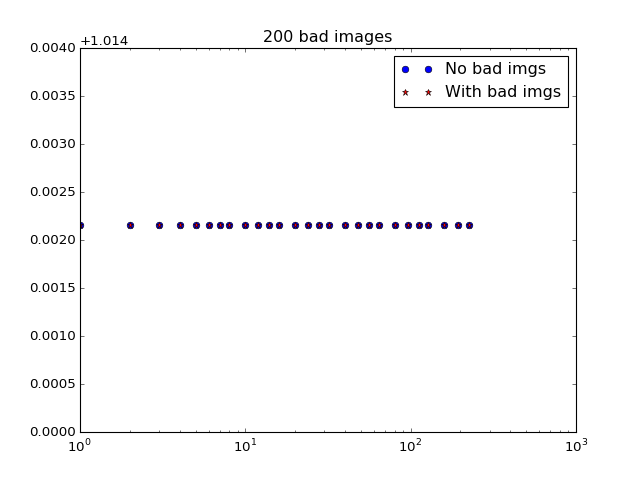

In [24]:
imgs = mask.bad_to_nan_gen(y, bad_list_200)
g2_200, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_200[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("200 bad images")
ax.legend()
plt.show()

## 300 bad images

In [25]:
bad_list_300 = np.random.choice(np.arange(10000), size=300)
bad_list_300

array([4223, 5389, 1832, 2964, 9879, 6357, 9251, 1656, 8793, 7008,   92,
       1039, 3558, 5293, 6151, 6678, 4714, 1460, 3539, 5904, 2970, 7860,
       8292, 4329, 7511, 3706, 8104, 3904, 1881, 2355, 6105, 4925, 2297,
       3585, 5273, 9055, 7869, 5550, 5245,  572, 3580, 2070, 9942,  623,
       1924, 7270, 5843, 1356,  678, 9688, 7906, 1188, 5237, 5444, 2713,
       7375,  221, 4577, 5662, 6381, 4348, 2179, 9731, 7338, 1527, 3525,
       4324, 3992, 8985, 1704, 4849, 6841, 3129, 3224, 6866, 8742, 6291,
        591, 1068, 4894, 7784, 3702, 8062,  664, 8829, 1163, 4126, 3089,
       5047, 5421, 3788, 7449, 9650, 7379, 9430, 9408, 7446, 6928, 9763,
       5946, 3919, 5313, 1635, 2254, 1537, 2572, 8817, 3043, 6374, 7032,
       6563, 4776, 8206, 4904, 7347, 3831, 2184, 4876, 6379, 8518, 4058,
       6392, 3170, 9325, 9605, 9571, 5925, 6259, 7545, 9082, 1751, 2523,
       3503, 7187, 1883, 4526, 2818, 7173, 4753, 9589, 2433, 8944,  503,
       8963, 7252, 4334, 9837, 6035, 4554, 4472,  9

<IPython.core.display.Javascript object>


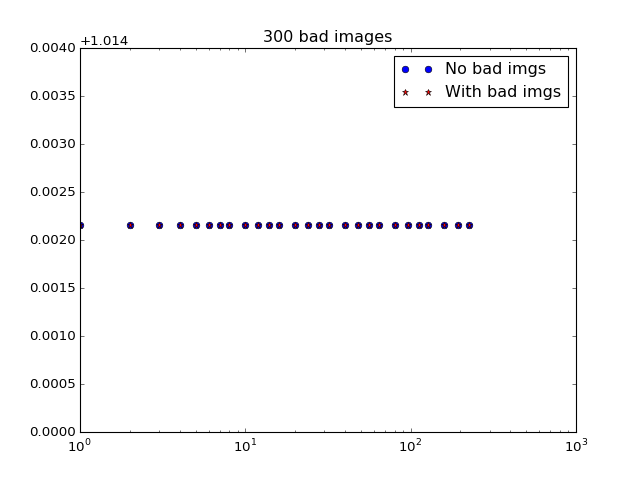

In [26]:
imgs = mask.bad_to_nan_gen(y, bad_list_300)
g2_300, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_300[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("300 bad images")
ax.legend()
plt.show()

## 500 bad images

<IPython.core.display.Javascript object>


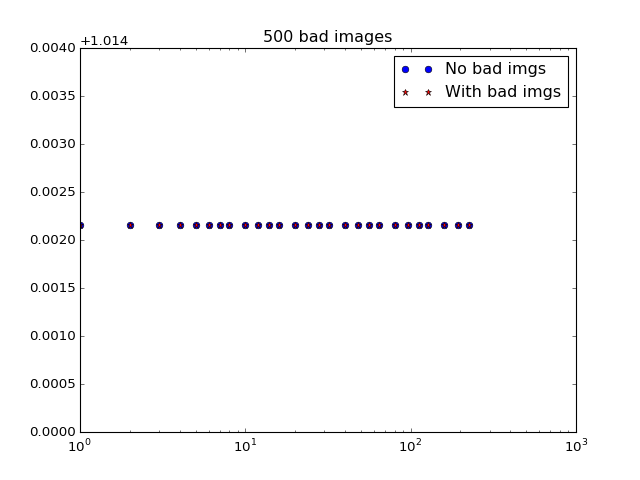

In [28]:
bad_list_500 = np.random.choice(np.arange(10000), size=500)
imgs = mask.bad_to_nan_gen(y, bad_list_500)
g2_500, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps, g2_500[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("500 bad images")
ax.legend()
plt.show()

## 1000 bad images

<IPython.core.display.Javascript object>


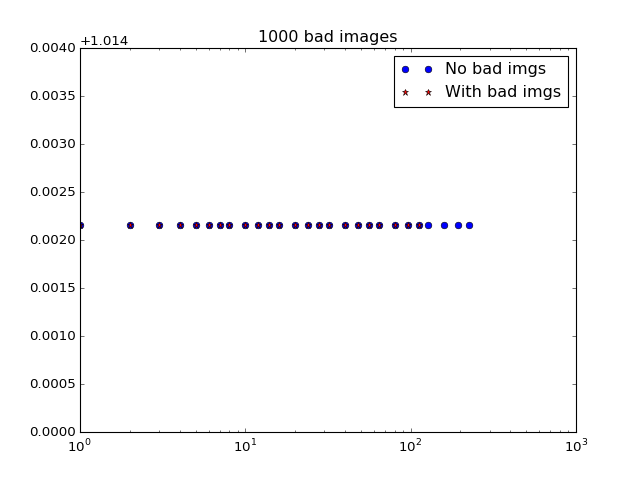

In [31]:
bad_list_1000 = np.random.choice(np.arange(10000), size=1000)
imgs = mask.bad_to_nan_gen(y, bad_list_1000)
g2_1000, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps_n, g2_1000[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("1000 bad images")
ax.legend()
plt.show()

## 2000 bad images

<IPython.core.display.Javascript object>


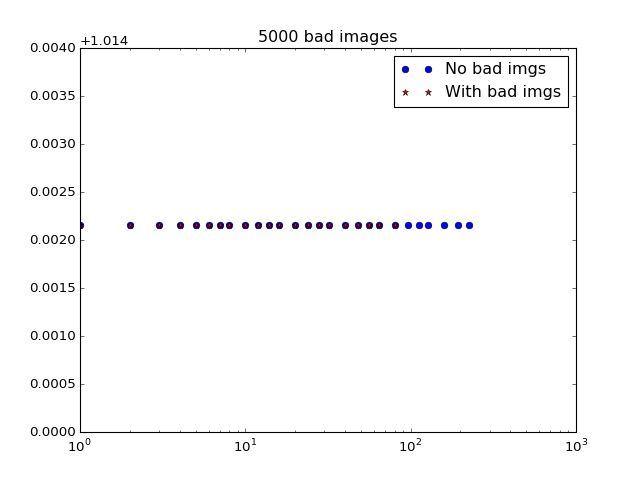

In [32]:
bad_list_2000 = np.random.choice(np.arange(10000), size=2000)
imgs = mask.bad_to_nan_gen(y, bad_list_2000)
g2_2000, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps_n, g2_2000[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("5000 bad images")
ax.legend()
plt.show()

## 2500 bad images

<IPython.core.display.Javascript object>


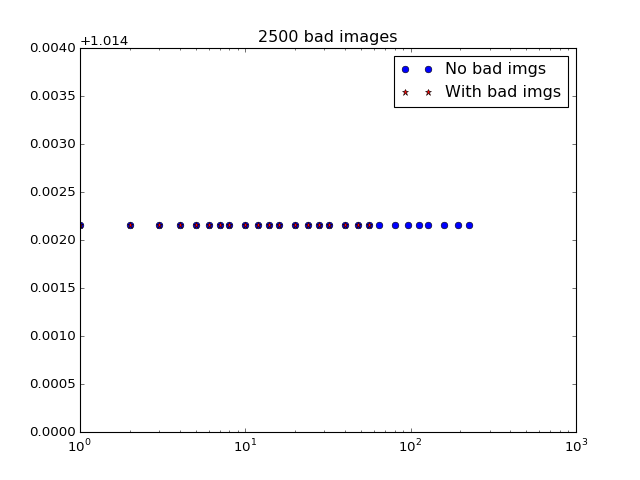

In [33]:
bad_list_2500 = np.random.choice(np.arange(10000), size=2500)
imgs = mask.bad_to_nan_gen(y, bad_list_2500)
g2_2500, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, imgs)
fig, ax = plt.subplots()
ax.semilogx(lag_steps, g2y[:, 0], "bo", label="No bad imgs")
ax.semilogx(lag_steps_n, g2_2500[:, 0], "r*", label="With bad imgs")
ax.set_ylim(bottom=1.014, top=1.018)
ax.set_title("2500 bad images")
ax.legend()
plt.show()

In [34]:
import skbeam

In [35]:
skbeam.__version__

'0.0.6+34.g73ae7f1'